In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
def u_z_inf(x, y, b):
    theta1 = np.arctan2(y,x-0.5)
    theta2 = np.arctan2(y,x-(-0.5))
    frac = (theta1-theta2)/(2*np.pi)
    return b*frac
  

def u_z_image(x, y, N):
    image_sum = 0
    for i in range(-N, N+1):
        for j in range(-N, N+1):
            R = [i*2, j*1]
            x_update = x-R[0]
            y_update = y-R[1]
            image_sum += u_z_inf(x_update,y_update,1)
    return image_sum


def u_z_error(x,y): 
    s_x = u_z_image(1,-0.5,10)-u_z_image(-1,-0.5,10)
    s_y = u_z_image(-1,0.5,10)-u_z_image(-1,-0.5,10)
    s = np.array([s_x, s_y])
    c_vec = np.array([(x/2)*2, y])
    err = (s[0]*c_vec[0])+(s[1]*c_vec[1])
    return err


def u_z_total(x,y):
 return u_z_image(x, y, 10) - u_z_error(x,y)
    

u_z_error(0,-0.5)

-0.17612159975297625

In [115]:
x_values = np.linspace(-1, 1, 1000)
y_values = np.linspace(-0.5, 0.5, 1000)
X, Y = np.meshgrid(x_values, y_values)
Z = u_z_total(X, Y)

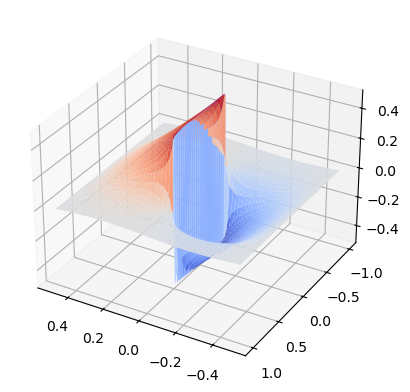

In [116]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(Y, X, Z, cmap='coolwarm', alpha=1)
ax.view_init(elev=30, azim=120)

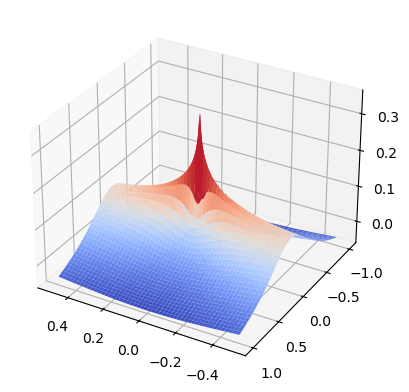

In [22]:
#### Edge dislocation displacements

def u_x (x,locx, y, b, v):
    factor = b/(2*np.pi)
    theta = np.arctan2(y,x-locx)
    term2 = ((x-locx)*y)/(2*(1-v)*((x-locx)**2+y**2))
    return factor*(theta + term2)

def u_x_image(x, y, N):
    image_sum = 0
    for i in range(-N, N+1):
        for j in range(-N, N+1):
            R = [i*2, j*1]
            x_update = x-R[0]
            y_update = y-R[1]
            image_sum += u_x(x_update,1,y_update,1, 0.25)
    return image_sum

def u_x_error(x,y): 
    s_x = u_x_image(1,-0.5,10)-u_x_image(-1,-0.5,10)
    s_y = u_x_image(-1,0.5,10)-u_x_image(-1,-0.5,10)
    s = np.array([s_x, s_y])
    c_vec = np.array([(x/2)*2, y])
    err = (s[0]*c_vec[0])+(s[1]*c_vec[1])
    return err


def u_y (x, y, b, v):
    factor = -b/(2*np.pi)
    term1 = ((1-2*v)/(4*(1-v)))*np.log(x**2+y**2)
    term2 = (x**2-y**2)/(4*(1-v)*(x**2+y**2))
    return factor*(term1+term2)




x_values = np.linspace(-1, 1, 1000)
y_values = np.linspace(-0.5, 0.5, 1000)
X, Y = np.meshgrid(x_values, y_values)
Z = u_y(X, Y, 1,0.25)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(Y, X, Z, cmap='coolwarm', alpha=1)
ax.view_init(elev=30, azim=120)